In [66]:
# Importing nessesories libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
file_path = "C:/Users/ASUS/Downloads/StudentsPerformance.csv"
df = pd.read_csv(file_path)

In [70]:
# Displaying basic information abount the dataset
basic_info = df.info()
head_data = df.head()
basic_info
head_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [72]:
# checking for missing values and data types
missing_values = df.isnull().sum()
data_types = df.dtypes
print(missing_values)
data_types

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [74]:
# Checking for duplicates rows
duplicates_rows = df.duplicated().sum()
duplicates_rows

0

In [76]:
# Summary statistics for numerical columns
summary_stats = df.describe()
summary_stats

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


 * Columns Overview:
  1.gender -	Student's gender
  2.race/ethnicity	-	Ethnic group (Group A to E)
  3.parental level of education	-	Parent's highest level of education
  4.lunch	-	Lunch type (standard or free/reduced)
  5.test preparation course	-	Whether student completed test prep course
  6.math score	-	Math score out of 100
  7.reading score	-	Reading score out of 100
  8.writing score	-	Writing score out of 100


The data set have 1000 students records
There are no missing values
There are no duplicates values
There are 5 categorical and 3 numeric fields


In [80]:
# Rename columns to be more Pythonic and easier to work with
df_cleaned = df.rename(columns={
    'gender': 'Gender',
    'race/ethnicity': 'Ethnicity',
    'parental level of education': 'Parental_Education',
    'lunch': 'Lunch',
    'test preparation course': 'Test_Preparation',
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score'
})


In [82]:
df_cleaned.head()

,Gender,Ethnicity,Parental_Education,Lunch,Test_Preparation,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


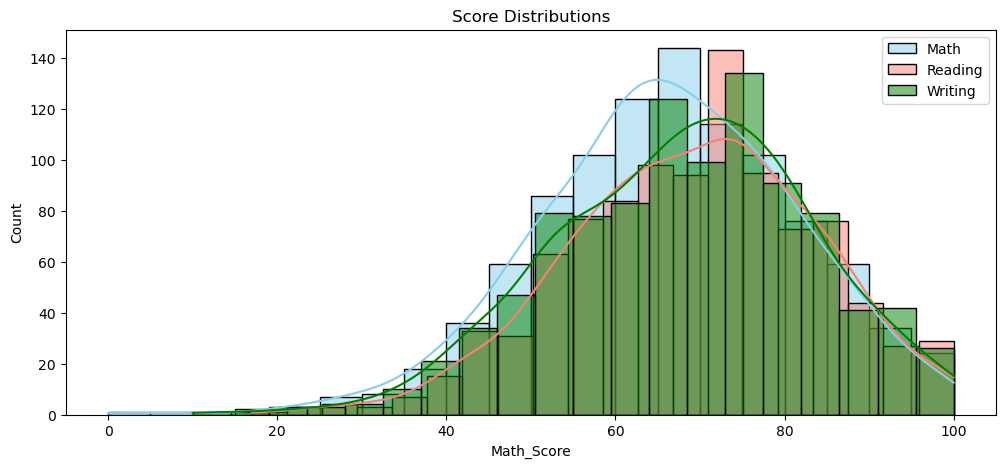

In [84]:
# 1. Distribution of Math, Reading, and Writing Scores
plt.figure(figsize=(12, 5))
sns.histplot(df_cleaned['Math_Score'], kde=True, color='skyblue', label='Math', bins=20)
sns.histplot(df_cleaned['Reading_Score'], kde=True, color='salmon', label='Reading', bins=20)
sns.histplot(df_cleaned['Writing_Score'], kde=True, color='green', label='Writing', bins=20)
plt.legend()
plt.title('Score Distributions')
plt.show()

1. Score Distributions
 * All three subjects (Math, Reading, Writing) have roughly normal distributions.

 * Math scores are slightly more spread out with a few low outliers.

<Figure size 1500x800 with 0 Axes>

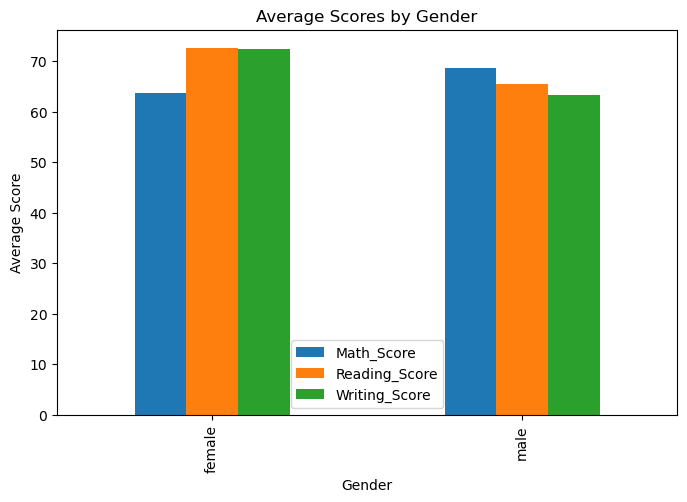

In [87]:
# 2. Average Scores by Gender
plt.figure(figsize=(15, 8))
score_means_by_gender = df_cleaned.groupby("Gender")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().reset_index()
score_means_by_gender.plot(x="Gender", kind="bar", figsize=(8, 5))
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()

2. Average Scores by Gender
 * Females outperform males in Reading and Writing.

 * Males slightly outperform females in Math.

<Figure size 800x500 with 0 Axes>

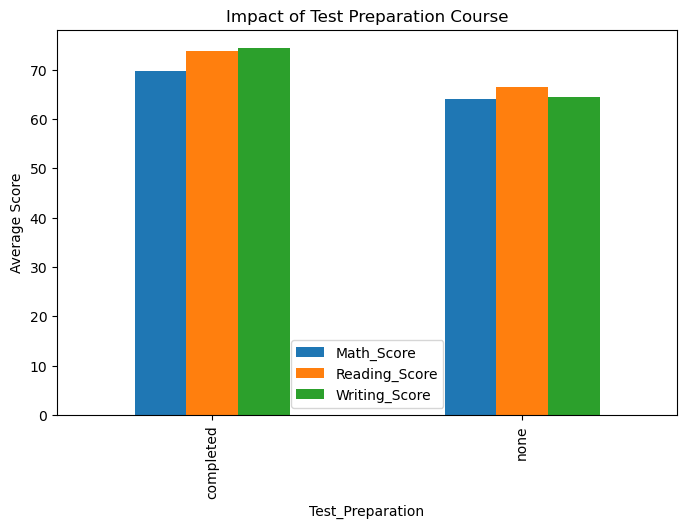

In [90]:
# 3. Test Preparation Course Impact
plt.figure(figsize=(8, 5))
df_cleaned.groupby("Test_Preparation")[["Math_Score", "Reading_Score", "Writing_Score"]].mean().plot(kind='bar', figsize=(8, 5))
plt.title("Impact of Test Preparation Course")
plt.ylabel("Average Score")
plt.show()

3. Test Preparation Impact
 * Students who completed the test preparation course score significantly higher across all subjects.